In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read the Data , Parse  Dates
marketing = pd.read_csv("marketing_new.csv", parse_dates=["date_subscribed","date_canceled","date_served"])
#Updates dtypes 
marketing['converted'] = marketing['converted'].astype('bool')
marketing['is_retained'] = marketing['is_retained'].astype('bool')

In [3]:
marketing.head(4)

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes


(-0.5, 1125.5, 599.5, -0.5)

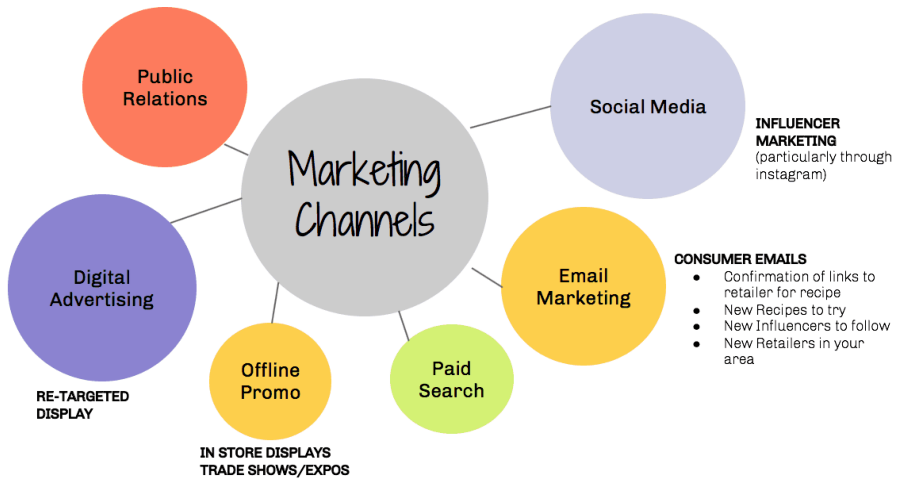

In [4]:
import imageio
plt.figure(figsize=(16,12))
im = imageio.imread("marketing-channels.png")
plt.imshow(im)
plt.axis("off")

# What are the Marketing Channels
## What are the  percentages 

In [5]:
# how many different marketing channel exisit
marketing.value_counts("marketing_channel")

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
dtype: int64

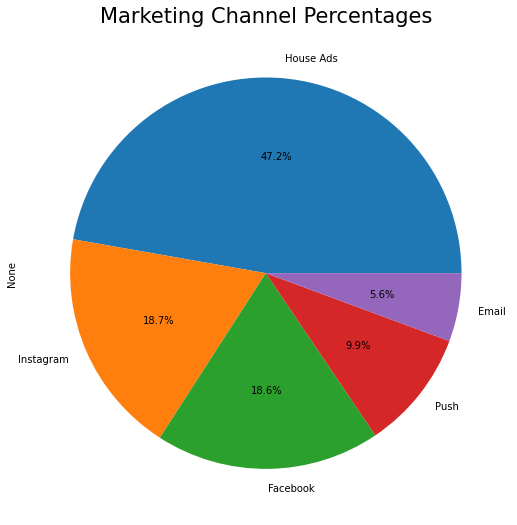

In [6]:
plt.figure(figsize=(12,9))

marketing.value_counts("marketing_channel").plot(kind= 'pie', autopct ='%1.1f%%')
plt.title("Marketing Channel Percentages", size=21)
plt.show()

In [7]:

def extract_column(data, col, condition):
  """
  take pandas DataFrame , reduce it to where col condition meets
  Parameters
  ---------
  data : Pandas Data Frame
  col : <'str'> where  assert (col in data.columns == True)

  condtion : <'str'> or bool operater
  """
  return data[data[col] == condition]

def group_data(data,groups ,desired_col ,agg_methods):
  """
  Parameters
  ---------

  data = Pandas DataFrame

  groups  = [string,string ...] or string

  desrired_col = string
  

  agg_method  = dict { sum, mean, median}

  Return 
  --------
  pandas dataframe

  """
  return data.groupby(groups)[[desired_col]].agg(agg_methods)



# What is the daily Subscription ?

In [20]:
# subsribers customers are the one converted == True

subscribers = marketing.loc[marketing['converted'] == True]

In [21]:
subscribers.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes


In [22]:

daily_total_users = marketing.groupby('date_served')[['user_id']].count().reset_index()
daily_sub = subscribers.groupby("date_served")[['user_id']].count().reset_index()


daily_sub_rate =daily_sub['user_id']  / daily_total_users['user_id'] * 100


In [23]:

import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(
    x=daily_sub["date_served"], y=daily_sub_rate,mode='lines+markers'))


fig.update_traces(line_color='#147852')

fig.show()

In [24]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
daily_sub_count = daily_sub['user_id']


# Group data together
hist_data = [daily_sub_count]

group_labels = ['Distplot']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,curve_type='normal',bin_size=10)
fig.show()

# What is the daily Retention?

In [25]:
retention = marketing.loc[marketing['is_retained'] == True]

retention.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes


In [26]:
daily_total_users = marketing.groupby('date_served')[['user_id']].count().reset_index()

daily_retention = retention.groupby('date_served')[['user_id']].count().reset_index()



In [27]:

import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(
    x=daily_retention["date_served"], y=daily_retention['user_id'],mode='lines+markers'))
#fig = px.line(daily_retention, x="date_served", y="user_id", title='Daily Customers Subscribtions')


fig.update_traces(line_color='#EE4B2B')

fig.show()

In [28]:
print("Average total number of loyal subscribers:" ,daily_retention['user_id'].mean(),"\n max total subscirbers :",daily_retention['user_id'].max(),"\n min subscirbers",daily_retention['user_id'].min() )

Average total number of loyal subscribers: 304.64516129032256 
 max total subscirbers : 745 
 min subscirbers 169


In [30]:
# what is the subscribtion

n_subscribers = subscribers['user_id'].nunique()
total = marketing['user_id'].nunique()


conversion = n_subscribers / total
print("Conversion rate is ", round(conversion * 100,2))

Conversion rate is  14.09


# MARKETING CHANNEL ANNALYSIS 


1.   WHAT THE CONVERSION RATE FOR PER CHANNEL


2.   WHAT THE RETENTION RATE FOR PER CHANNEL




In [37]:
subscribers_by_channels = subscribers.groupby('marketing_channel')[["user_id"]].count()

total_users_by_channels = marketing.groupby('marketing_channel')[["user_id"]].count()

In [35]:
subscribers_by_channels

,user_id
marketing_channel,
Email,193
Facebook,237
House Ads,298
Instagram,265
Push,83


In [46]:
#WHAT IS THE CONVERSION  FOR EACH MARKETING CHANNEL

conversion_per_channel = round(subscribers_by_channels['user_id'] / total_users_by_channels['user_id'] * 100,2).reset_index().sort_values("marketing_channel",ascending = False)


In [47]:
conversion_per_channel.head()

,marketing_channel,user_id
4,Push,8.36
3,Instagram,14.16
2,House Ads,6.30
1,Facebook,12.74
0,Email,34.16


In [49]:
import plotly.express as px
fig = px.pie(conversion_per_channel, values='user_id', names='marketing_channel', title='Marketing Channels Portions')
fig.show()

In [53]:
retention_per_channel = round(subscribers_by_channels['user_id'] / total_users_by_channels['user_id'] * 100,2).reset_index().sort_values("marketing_channel",ascending = False)
retention_by_channels = retention.groupby('marketing_channel')[["user_id"]].count()


retention_per_channel

,marketing_channel,user_id
4,Push,8.36
3,Instagram,14.16
2,House Ads,6.30
1,Facebook,12.74
0,Email,34.16


In [66]:


fig = px.bar(retention_per_channel, x="user_id", y="marketing_channel",
             color = 'marketing_channel', title="Long-Form Input", text='user_id')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

# LANGUAGE-CONVERSION ANALAYSIS

*   WHAT IS LANGUAGE DISTRIBUITON
*   HOW IS THE CONVERSTION OVER TIME AND LANGUANGE



In [91]:
subscribers_by_language = subscribers.groupby('language_displayed')[["user_id"]].count()
total_users_by_language = marketing.groupby('language_displayed')[["user_id"]].count()

conversion_by_language =np.round(subscribers_by_language['user_id'] / total_users_by_language['user_id'] * 100,2).reset_index()
conversion_by_language

,language_displayed,user_id
0,Arabic,44.44
1,English,10.23
2,German,65.43
3,Spanish,17.65


In [94]:
conversion_by_language = conversion_by_language.sort_values("user_id", ascending =False)
fig = px.bar(conversion_by_language, x="user_id", y="language_displayed",
             color = 'language_displayed', title="Conversion by Language", text='user_id')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [95]:
retention_by_language = retention.groupby('language_displayed')[["user_id"]].count()
total_users_by_language = marketing.groupby('language_displayed')[["user_id"]].count()

retention_by_language =np.round(retention_by_language['user_id'] / total_users_by_language['user_id'] * 100,2).reset_index()
retention_by_language

,language_displayed,user_id
0,Arabic,81.48
1,English,94.53
2,German,75.31
3,Spanish,88.24


In [96]:
retention_by_language = retention_by_language.sort_values("user_id", ascending =False)
fig = px.bar(retention_by_language, x="user_id", y="language_displayed",
             color = 'language_displayed', title="Retention by Language", text='user_id')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

# AGE GROUP - LANGUAGE


In [98]:
age = marketing.groupby(['language_preferred','age_group'])[['user_id']].count()
age = pd.DataFrame(age.unstack(level=1))
age.head()

user_id                                                  \
age_group          0-18 years 19-24 years 24-30 years 30-36 years 36-45 years   
language_preferred                                                              
Arabic                     19          26          19          19          19   
English                  1421        1560        1442        1251        1260   
German                     31          29          35          16          19   
Spanish                    68          67          72          69          55   

                                          
age_group          45-55 years 55+ years  
language_preferred                        
Arabic                      21        22  
English                   1240      1101  
German                      25        12  
Spanish                     67        52

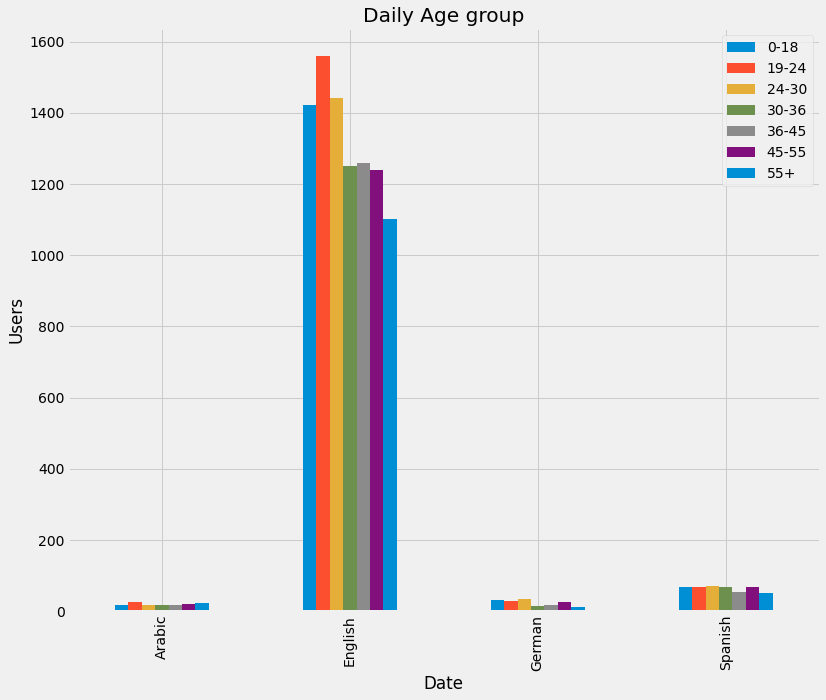

In [99]:

plt.style.use('fivethirtyeight')
age.plot(figsize=(12,10), kind='bar')
plt.title('Daily Age group')
plt.xlabel("Date")
plt.ylabel("Users")

plt.legend(loc ='upper right',labels = ['0-18','19-24',"24-30","30-36","36-45","45-55","55+"])

# A/B TESTING


In [155]:
email_marketing = marketing.loc[marketing['marketing_channel'] =='Email']

email_marketing.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
354,354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True,0.0,4.0,Yes
358,358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True,4.0,4.0,Yes
362,362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True,1.0,4.0,Yes
366,366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False,5.0,4.0,Yes
370,370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False,2.0,4.0,Yes


           variant  user_id
0          control      270
1  personalization      284


<AxesSubplot:xlabel='variant'>

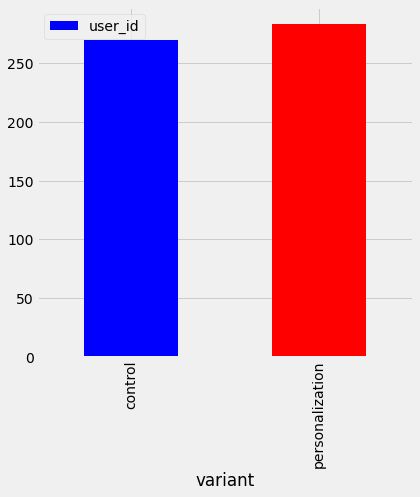

In [156]:
allocation = email_marketing.groupby('variant')[['user_id']].nunique().reset_index()
print(allocation)

allocation.plot(x = 'variant', y ='user_id',kind ='bar',figsize=(6,6), color =['blue','red'])

In [157]:
sub = email_marketing.groupby(['user_id','variant'])['converted'].max()

sub = pd.DataFrame(sub.unstack(level=1)).head()

In [158]:
sub.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


In [159]:
controll  = marketing[(marketing['marketing_channel'] =='Email') & (marketing['variant'] == 'control')]['converted']

personalization =marketing[(marketing['marketing_channel'] =='Email') & (marketing['variant'] == 'personalization')]['converted']


print("average conversion on control group is {} and personalized group {}".format(round(controll.mean()*100, 2), round(personalization.mean()*100,2)))

average conversion on control group is 29.2 and personalized group 38.83


In [160]:
#what is the lift

lift = (personalization.mean() - controll.mean())/ controll.mean()

print("lift is. :" ,round(lift* 100 , 2),"%")

lift is. : 33.0 %


In [161]:
# significance test (T Test)

from scipy.stats import ttest_ind

t = ttest_ind(controll, personalization)

print(t)

Ttest_indResult(statistic=-2.421624090319185, pvalue=0.015766251025660996)


In [162]:
# we can say statistically significant,